In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [529]:
df = pd.read_excel('Book1.xlsx', index_col = 'datetime')

In [530]:
df.columns

Index(['name', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'flood occurrence', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin'],
      dtype='object')

In [531]:
df.index

DatetimeIndex(['2004-05-13', '2004-05-14', '2004-05-15', '2004-05-16',
               '2004-05-17', '2004-05-18', '2004-05-19', '2004-05-20',
               '2004-05-21', '2004-05-22',
               ...
               '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27',
               '2024-06-28', '2024-06-29', '2024-06-30', '2024-07-01',
               '2024-07-02', '2024-07-03'],
              dtype='datetime64[ns]', name='datetime', length=7357, freq=None)

let us convert the datetime to the correct data types

In [532]:
df.index = pd.to_datetime(df.index)

In [533]:
df.sort_index(inplace=True)

In [534]:
df = df.asfreq('D')

In [535]:
df.index

DatetimeIndex(['2004-05-13', '2004-05-14', '2004-05-15', '2004-05-16',
               '2004-05-17', '2004-05-18', '2004-05-19', '2004-05-20',
               '2004-05-21', '2004-05-22',
               ...
               '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27',
               '2024-06-28', '2024-06-29', '2024-06-30', '2024-07-01',
               '2024-07-02', '2024-07-03'],
              dtype='datetime64[ns]', name='datetime', length=7357, freq='D')

#### Handling missing values

In [536]:
df = df.filter(['datetime','precip','precipprob',  'precipcover', 'preciptype','windgust', 'windspeed', 'winddir', 'tempmax', 'tempmin', 'temp','dew', 'humidity', 'sealevelpressure', 'moonphase', 'flood occurrence'] , axis=1)

In [537]:
df.duplicated().sum()

243

In [538]:
df.drop_duplicates(inplace = True)

In [539]:
df.duplicated().sum()

0

In [540]:
df.isna().sum()

precip                93
precipprob            93
precipcover            0
preciptype          3774
windgust            1694
windspeed            357
winddir              471
tempmax               93
tempmin               93
temp                  93
dew                   93
humidity              93
sealevelpressure     278
moonphase            357
flood occurrence    3633
dtype: int64

In [541]:
df.preciptype.fillna('no_rain', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13080\2972831032.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.preciptype.fillna('no_rain', inplace=True)


In [542]:
median = df.windgust.median()
df.windgust.fillna(median, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13080\2983379472.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.windgust.fillna(median, inplace=True)


In [543]:
median = df.sealevelpressure.median()
df.sealevelpressure.fillna(median, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13080\1608615473.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sealevelpressure.fillna(median, inplace=True)


In [544]:
df['flood_occurrence'] = df['precipcover'].apply(lambda x: 1 if x > 20 else 0)

In [545]:
df.dropna(inplace=True)

In [546]:
flood_df = df[df['flood_occurrence'] == 1]

In [547]:
flood_df.index.year

Index([2010, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       ...
       2023, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='datetime', length=311)

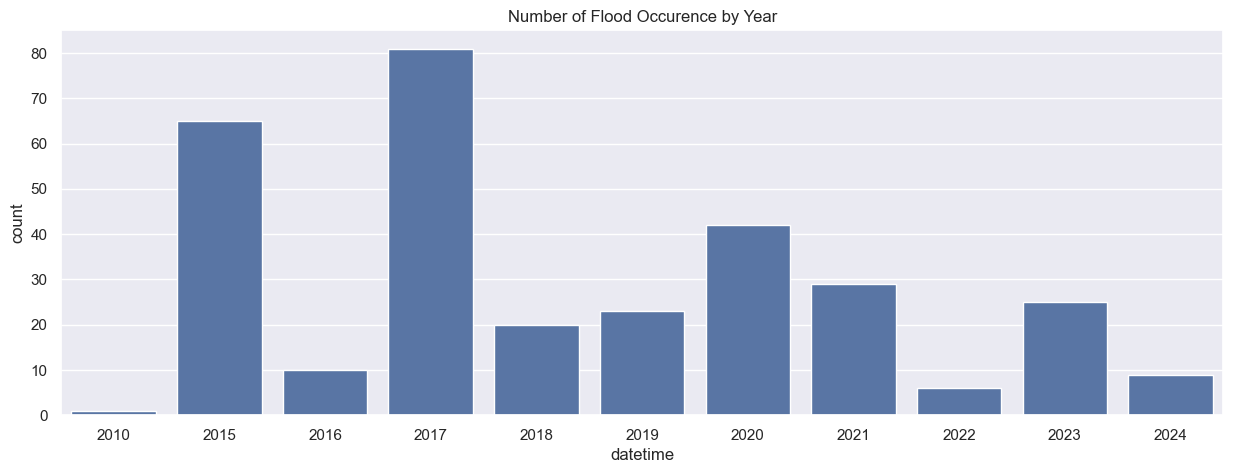

In [548]:
# show the trend of flood occurence by year
plt.figure(figsize=(15,5))
plt.title('Number of Flood Occurence by Year')
sns.countplot(data=flood_df, x= flood_df.index.year)
plt.show()

In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3479 entries, 2004-08-13 to 2024-07-03
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   precip            3479 non-null   float64
 1   precipprob        3479 non-null   float64
 2   precipcover       3479 non-null   float64
 3   preciptype        3479 non-null   object 
 4   windgust          3479 non-null   float64
 5   windspeed         3479 non-null   float64
 6   winddir           3479 non-null   float64
 7   tempmax           3479 non-null   float64
 8   tempmin           3479 non-null   float64
 9   temp              3479 non-null   float64
 10  dew               3479 non-null   float64
 11  humidity          3479 non-null   float64
 12  sealevelpressure  3479 non-null   float64
 13  moonphase         3479 non-null   float64
 14  flood occurrence  3479 non-null   float64
 15  flood_occurrence  3479 non-null   int64  
dtypes: float64(14), int64(1)

In [550]:
df.isna().sum()

precip              0
precipprob          0
precipcover         0
preciptype          0
windgust            0
windspeed           0
winddir             0
tempmax             0
tempmin             0
temp                0
dew                 0
humidity            0
sealevelpressure    0
moonphase           0
flood occurrence    0
flood_occurrence    0
dtype: int64

In [551]:

# Check for missing values after preprocessing
print("Missing values in data:\n", df.isnull().sum())

Missing values in data:
 precip              0
precipprob          0
precipcover         0
preciptype          0
windgust            0
windspeed           0
winddir             0
tempmax             0
tempmin             0
temp                0
dew                 0
humidity            0
sealevelpressure    0
moonphase           0
flood occurrence    0
flood_occurrence    0
dtype: int64


# Using ARIMA to predict with flood occurence

Let us fit the model

In [553]:
df_flood = df['flood_occurrence']

In [580]:
model = ARIMA(df_flood, order = (5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 8)
forecast_index = pd.date_range(start = df_flood.index[-1], periods = 10, freq = 'D')[5:]
heavy_rain_threshold = 0.7
flood_days = forecast[forecast > heavy_rain_threshold].head(7)
values_list = flood_days.tolist()
flood_prediction = pd.DataFrame(values_list, forecast_index, columns =  ['Flood prediction'])

C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\python_install\Lib\site-packa

In [579]:
flood_prediction

,Flood prediction
2024-07-08,0.790888
2024-07-09,0.778454
2024-07-10,0.759639
2024-07-11,0.724173
2024-07-12,0.732145


### From the model prediciton the next flooding date would be on the 8th and 9th of July 2024

We used the flood occurence column and analyzing with ARIMA, 8th of july is the day with the highest flood capacity

# Using ARIMA to predict with precipitation

In [474]:
df_precip = df['precip']

In [608]:
model = ARIMA(df_precip, order = (5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 11)
heavy_rain_threshold = 21
flood_days = forecast[forecast > heavy_rain_threshold]
forecast_index = pd.date_range(start = df_precip.index[-1], periods = 10, freq = 'D')[5:]
values_list = flood_days.tolist()
flood_prediction = pd.DataFrame(values_list, forecast_index, columns =  ['Flood prediction'])

C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\python_install\Lib\site-packa

In [609]:
flood_prediction

,Flood prediction
2024-07-08,21.990016
2024-07-09,25.046303
2024-07-10,21.231725
2024-07-11,21.371546
2024-07-12,21.663664


# Using ARIMA with precipitation cover

In [615]:
df_precipcover = df['precipcover']
model = ARIMA(df_precipcover, order = (5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 11)
heavy_rain_threshold = 55
flood_days = forecast[forecast > heavy_rain_threshold]
forecast_index = pd.date_range(start = df_precipcover.index[-1], periods = 9, freq = 'D')[5:]
values_list = flood_days.tolist()
flood_prediction = pd.DataFrame(values_list, forecast_index, columns =  ['Flood prediction'])
flood_prediction

C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\python_install\Lib\site-packa

,Flood prediction
2024-07-08,56.314406
2024-07-09,56.591846
2024-07-10,55.019092
2024-07-11,55.159068


# Using ARIMA to predict with moonphase

In [587]:
df_cm = df['moonphase']

In [622]:
model = ARIMA(df_cm, order = (5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 11)
heavy_rain_threshold = 0.89
flood_days = forecast[forecast > heavy_rain_threshold].head(5)
forecast_index = pd.date_range(start = df_cm.index[-1], periods = 10, freq = 'D')[5:]
values_list = flood_days.tolist()
flood_prediction = pd.DataFrame(values_list, forecast_index, columns =  ['Flood prediction'])
flood_prediction

C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\python_install\Lib\site-packa

,Flood prediction
2024-07-08,0.902886
2024-07-09,0.897754
2024-07-10,0.893606
2024-07-11,0.891337
2024-07-12,0.890338


I used ARIMA on the moonphase again and i got the predicition for 8th of July and 9th of July 2024

# Using ARIMA on precipitation probability

In [590]:
df_prob = df['precipprob']

In [629]:
model = ARIMA(df_prob, order = (5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 11)
heavy_rain_threshold = 100
flood_days = forecast[forecast == heavy_rain_threshold].head(5)
forecast_index = pd.date_range(start = df_prob.index[-1], periods = 10, freq = 'D')[5:]
values_list = flood_days.tolist()
flood_prediction = pd.DataFrame(values_list, forecast_index, columns =  ['Flood prediction'])
flood_prediction

C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\python_install\Lib\site-packa

,Flood prediction
2024-07-08,100.0
2024-07-09,100.0
2024-07-10,100.0
2024-07-11,100.0
2024-07-12,100.0


###### Using precipitation probabiblity, the preobabilty for precipitation on 8th of July is 100 percent

# Using ARIMA with humidity

In [593]:
df_hum = df['humidity']

In [625]:
model = ARIMA(df_hum, order = (5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 11)
heavy_rain_threshold = 88.9
flood_days = forecast[forecast > heavy_rain_threshold].head(5)
forecast_index = pd.date_range(start = df_hum.index[-1], periods = 10, freq = 'D')[5:]
values_list = flood_days.tolist()
flood_prediction = pd.DataFrame(values_list, forecast_index, columns =  ['Flood prediction'])

C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python_install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\python_install\Lib\site-packa

In [626]:
flood_prediction

,Flood prediction
2024-07-08,90.658551
2024-07-09,89.706514
2024-07-10,89.362526
2024-07-11,89.431434
2024-07-12,89.371049


###### We also got 8th of July to be the day with the highest humidity levels.

# Conclusion
The next flood prediction date is 8th of July and 9th of July 2024.
I used ARIMA  stats model on each of the following and all the tested 8th and 9th of July as the next prediciton date:
- The flood occurence was the highest on 8th and 9th of July. 
- The precipitation cover was the high on both day. Precipitation Cover tells the percentage of time during the reporting window that the precipitation actually occurred. More extended period of rain increases flood risk.
- The precipitation was also the highest on both days. Direct measurement of precipiation indicate more rain.
- The precipitation probability indicated it would rain on the 8th and 9th of July.
- The moonphase were also high on both days, water level rise during full moon. 
- The humidity levels were the highes on both days. High humidity levels can lead to more precipitation.
